<a href="https://colab.research.google.com/github/jdescartes24/Stroke-Predictions/blob/main/Stroke_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [453]:

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [412]:
df= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [413]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## ***checking the Dtypes and getting an overall view of my data***

In [414]:
df.info()
# checking the Dtypes and getting an overall view of my data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# ***Checking for missing data***

In [415]:
# chceking for null values
df.isnull().sum()
# There are 201 values missing in the bmi column this will be taken care of later in the code with num selector strategey = Most Freques.

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# ***LOOKING INTO THE MISSING DATA***

In [416]:
#Getting the missing data to start analyzing
bmi_missing = df['bmi'].isna()

#Getting all the missing values and passing it into a new dataframe

x=df.loc[bmi_missing,:]

#calling that new dataframe
x

# Ther is no clear way to fill in the values just just looking for similarities in the given data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


# ***Checking to see how much of the patients with stoke that we would loose if we had to drop missing rows***

In [417]:
x['stroke'].value_counts()

#we were going to loose over 40 of our stroke patients if we were to drop these columns

0    161
1     40
Name: stroke, dtype: int64

# ***Creating a Function to help me check the calues of each of the columns in my data***

In [418]:
# cheking values of my columns to see if there are and miss spelling or out of place data
def values(x):
  x=df[x].value_counts()
  print(x)
values('gender')
values('ever_married')
values('work_type')
values('Residence_type')
values('smoking_status')
values('stroke')
# There were no inconsistances in my data 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


# ***Checking For duplicates, and droping them if found.***

In [419]:
# checking for duplicates
df.drop_duplicates().any()

# dropping all duplicates
df.drop_duplicates(inplace=True)

# ***Here I am droping the 'id' column, and the gender row  wich says other, because I believe they does not play a roll in predicting the data. Its just a random number applied to a patient.***

In [420]:
df=df.drop(columns='id')
df = df[df.gender != 'Other']
values('gender')

Female    2994
Male      2115
Name: gender, dtype: int64


# ***Creating a boxplot of the age columns***

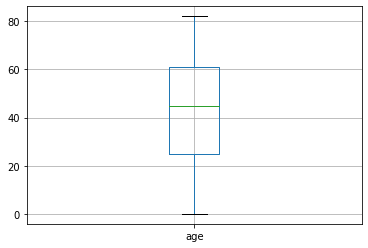

In [421]:
df.boxplot(column='age');
#looking at this boxplot we can see that the average age is50 years old.




# ***Creating a histogram of the age columns***

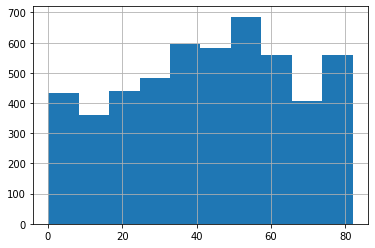

In [422]:
df['age'].hist();

# ***Creating a histogram of the hypertension column***

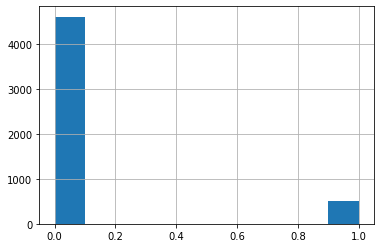

In [423]:
df['hypertension'].hist();

# ***Creating a histogram of the heart disease columns***

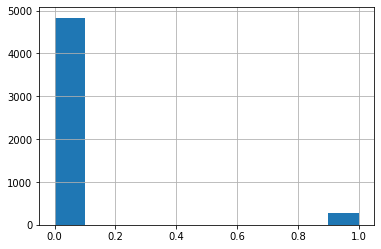

In [424]:
df['heart_disease'].hist();

# ***Creating a histogram of the ever married column***

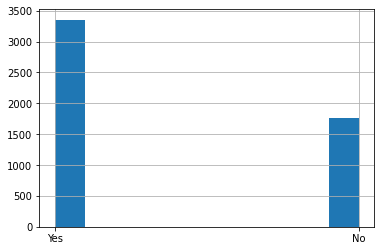

In [425]:
df['ever_married'].hist();

# ***Creating a histogram of the work type column***

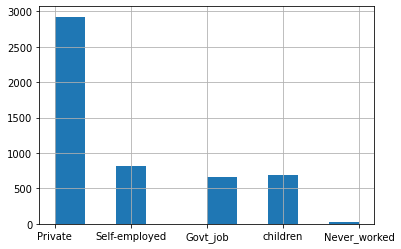

In [426]:
df['work_type'].hist();

# ***Creating a histogram of the Residence type column***

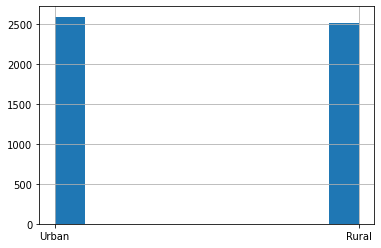

In [427]:
df['Residence_type'].hist();

# ***Creating a histogram of the average glucose level column***

AxesSubplot(0.125,0.125;0.775x0.755)


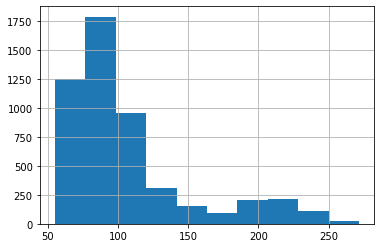

In [428]:
print(df['avg_glucose_level'].hist());


# ***Creating a boxplot of the average glucose level column***

AxesSubplot(0.125,0.125;0.775x0.755)


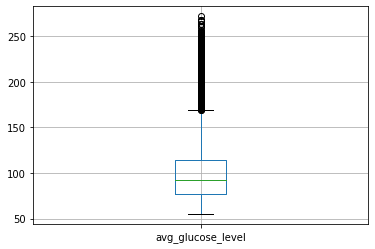

In [429]:
print(df.boxplot(column= 'avg_glucose_level'));

# ***Creating a histogram of the bmi level column***

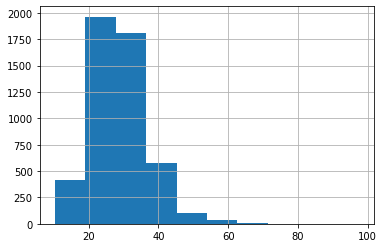

In [430]:
df['bmi'].hist();

# ***Creating a boxplot of the bmi level column***

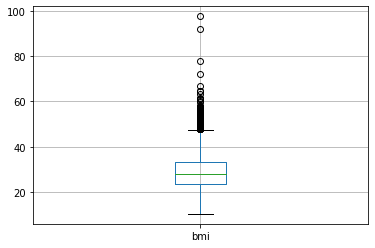

In [431]:
df.boxplot(column='bmi');

## ***Creating a histogram of the smoking status level column***

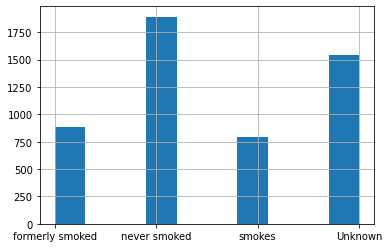

In [432]:
df['smoking_status'].hist();

# ***This Scatter plot using two columns , the average glucose levels and age of the patient to gain some insite on what type of patient is have a stroke.***

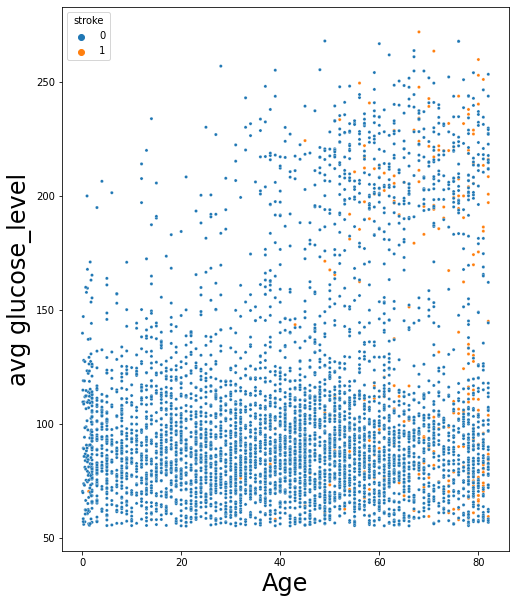

In [433]:
plt.figure(figsize= (8,10))

sns.scatterplot(data=df, x= 'age' , y= 'avg_glucose_level', hue= 'stroke', s=10);

plt.xlabel('Age',size=24);

plt.ylabel('avg glucose_level',size=24);



# ***Creating a CoorRelation Heatmap of my data***

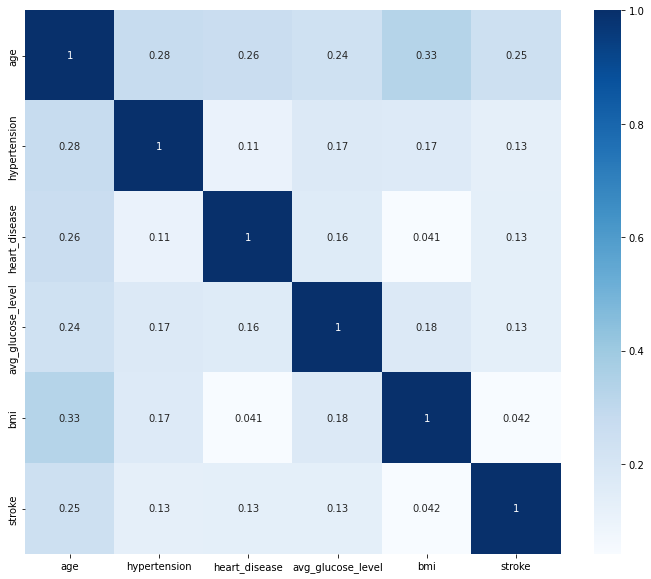

In [434]:
plt.figure(figsize= (12,10))

sns.heatmap(df.corr(), annot=True, cmap='Blues');
# There were no strong coorelations in this heat map.

# ***Now I will be preparing my data for modeling***

In [435]:
# creating my target and features matrix.

X = df.drop(columns = 'stroke')

y = df['stroke']

In [436]:
# Creating my train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [437]:
# as we contiune with preping our code, I will be making a out cat colum selectors.

# Selecting all the object data type columns and passing it to variable.
cat_col= make_column_selector(dtype_include = 'object')

# Selecting all the int columns and adding passing it to a variable.
num_col= make_column_selector(dtype_include= 'number')


In [438]:
# I choose median for filling in the missing values 
# Since there was no correlation between missing data a already filled data I decided to go with median to get back solid numbers that are practical .
median_imputer = SimpleImputer(strategy='mean')

In [439]:
# Making an instance of  standard scaler so I can use on our numerical values since the are not closly related.
scaler= StandardScaler()

# Making an instance of the one hot encoder, which will used on the rest of the numerical values for better performance of the model.
ohe = OneHotEncoder(handle_unknown= 'ignore', sparse= False)

In [440]:
cat_pipe = make_pipeline(ohe)

# Creating a num pipe to have the correct sequence for the transformation of columns
num_pipe = make_pipeline(median_imputer, scaler)

# Creating a tuple for my num pipe
num_tup = (num_pipe, num_col)

#- Creating a tuple for my cat pipe
cat_tup = (cat_pipe, cat_col)

# Making a instance of the column transform function and passing my tuples into them.

column_transfom = make_column_transformer( num_tup, cat_tup)

# ***Using the logistic regressor***

In [441]:
# Making an instance of the logistic Regressor
log_reg= LogisticRegression()

# now I will be creating a pipline to fit the logistic regressor onto the data
log_pipe= make_pipeline(column_transfom, log_reg)

# not fiting the pipe onto my data
log_pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose.

# ***Hypertuning my model***

In [442]:
# Getting parameters to hyper tune
log_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830dd0>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),


In [443]:
# using a dictionary to make hyperparameters to tet the data

param_grid = {'logisticregression__C': [1.0, 1.5,2,2.5],
              'logisticregression__penalty': ['l2','l1'],
              'logisticregression__solver': ['lbfgs','sag','saga']}

In [444]:
# isinstanciating the gridsearch model using my previous pipe and adding in the parameters
grid= GridSearchCV(log_pipe, param_grid)

# fitting the new grid sheach model on my training data
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                 

In [445]:
# Getting the  parameters that helped the model perform the best.
grid.best_params_

{'logisticregression__C': 1.0,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

# ***Getting Accuracy score***

In [446]:
# passing the trainig data accuracy score into a variable and then printing
Precision_Train_Score = accuracy_score(y_train, grid.predict(X_train))

print(f'The Accuracy train score is {Precision_Train_Score}')

# Passing the testing accuracy score into a variable and then printing it
Precision_Test_Score = accuracy_score(y_test, grid.predict(X_test))

print(f'The Accuracy test score is {Precision_Test_Score}')

The Accuracy train score is 0.9558861915948839
The Accuracy test score is 0.9381846635367762


# ***Using the K Nearest neighbors on my data***

In [447]:
# Making an instance of the KNeighbours model
KNN= KNeighborsClassifier()

# now I will be creating a pipline to fit the KNN model onto the data
KNN_pipe= make_pipeline(column_transfom, KNN)

# not fiting the pipe onto my data
KNN_pipe.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose.

In [448]:
#getting the parameter to hypertune my model
KNN_pipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830dd0>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer()),


# ***Hypertuning my KNN model using a grid search***

In [449]:
# using a dictionary to make hyperparameters to tet the data

knn_grid =  {'kneighborsclassifier__leaf_size':[2,3,5,10,15,20,30,40],
            'kneighborsclassifier__n_neighbors':[3,4,5,6,7,8],
            'kneighborsclassifier__p':[1,2],
            'kneighborsclassifier__weights':['distance','uniform']}

In [450]:
# isinstanciating the gridsearch model using my previous pipe and adding in the parameters
gridknn = GridSearchCV(KNN_pipe, knn_grid)

# fitting the new grid sheach model on my training data
gridknn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd29b830a10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                 

In [451]:
gridknn.best_params_

{'kneighborsclassifier__leaf_size': 2,
 'kneighborsclassifier__n_neighbors': 4,
 'kneighborsclassifier__p': 1,
 'kneighborsclassifier__weights': 'uniform'}

# ***Testing Accuracy score***

In [452]:
# passing the trainig data accuracy score into a variable and then printing
Precisionn_Score = accuracy_score(y_train, gridknn.predict(X_train))

print(f'The Accuracy train score is {Precisionn_Score}')

# Passing the testing accuracy score into a variable and then printing it
Precisions_Test_Score = accuracy_score(y_test, gridknn.predict(X_test))

print(f'The Accuracy test score is {Precisions_Test_Score}')

The Accuracy train score is 0.9577133907595928
The Accuracy test score is 0.9358372456964006
